<a href="https://colab.research.google.com/github/Caterpillar-T/MAT-421/blob/main/Homework_3_MAT_421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3 MAT 421

Kyle Tucker

**Section 17.4: Lagrange Polynomial Interpolation**

Finding a single polynomial goes through all data points it is referred to as a Lagrange polynomial interpolation.

The function has the property $L(x_i) = y_i$

A trick for computation of these polynomials is writing them as a linear combination of Lagrange basis polynomials, denoted as $P_i(x)$, where $P_i(x) = ∏^{n}_{j = 1, j \not= i} \frac{x-x_j}{x_i - x_k}$ and where $L(x) = ∑^{n}_{i=1} y_iP_i(x)$.

For example we will take a data set where $x = [-6, -5, -4]$ and $y = [6,9,4]$ and took a look at the Lagrange polynomial interpolation.

In [ ]:
from scipy.interpolate import lagrange

In [ ]:
x=[-6,-5,-4]
y=[6,9,4]

x_new = np.arange(-15,3,0.1)

f = lagrange(x,y)

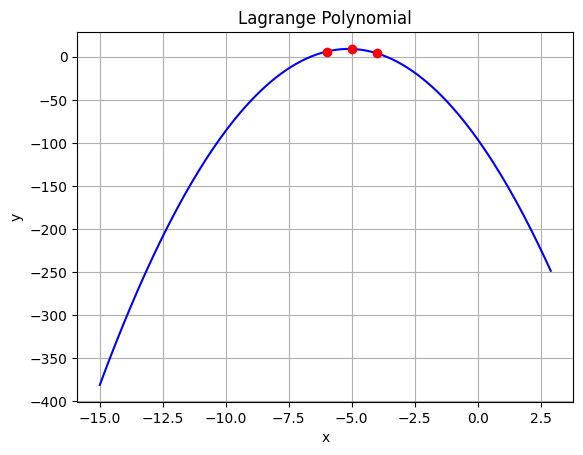

In [ ]:
fig = plt.figure
plt.plot(x_new, f(x_new),'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Section 17.5: Newton's Polynomial Interpolation**

Newton's polynomial can be expressed in a general form that goes through $n$ points but the series feels both more precise and easier to understand. The series is written: $f(x) = ∑^{n}_{i=0}a_in_i(x)$ where $n_i(x) = ∏^{i-1}_{j=0}(x-x_j)$

$a_i$ is easy enough to determine through the simple fact for any data points $(x_i, y_i)$, $f(x_i) = y_i$. In any case all that is required is putting the expression in function of $a_i$ which does follow a simple pattern of divided differences.

As an example let us take the data set where $x = [0, 3, 7, 12]$ and $y = [9, 4, -1, 8]$ and see what the Newton's polynomial interpolation looks like.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def dd(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef
def newton(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

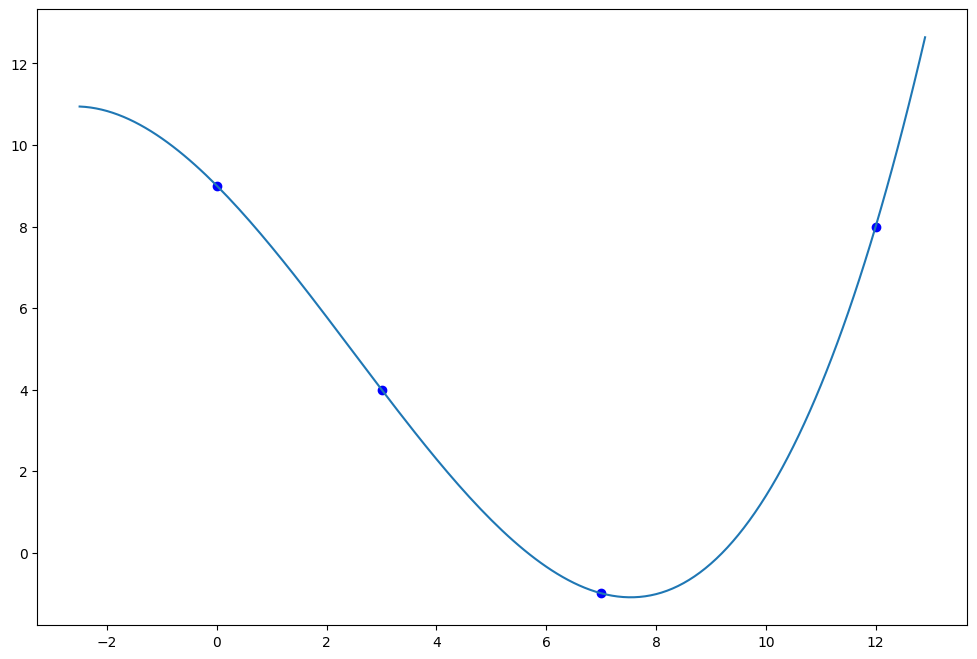

In [ ]:
x = np.array([0, 3, 7, 12])
y = np.array([9, 4, -1, 8])
a_s = dd(x, y)[0, :]
x_new = np.arange(-2.5, 13, .1)
y_new = newton(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)